Hago la simulacion de la funcion sir solo con pocos paises para ver mejor la interacción entre ellos.

In [1]:
# allows to import own functions
import sys
import os
path_name = os.getcwd()
root_project = os.path.split(path_name)[0]
sys.path.append(root_project)

from src.models.sir_model import sir_model
from src.utils.help_func import construct_dataframe

from matplotlib.ticker import PercentFormatter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
# pd.reset_option('display.max_rows')

In [3]:
OD = np.load('../data/interim/od_matrix.npy')
# OD = np.zeros(OD.shape)
df_countries = pd.read_pickle('../data/interim/country_info_final.gpickle')

In [4]:
df_countries['country_name']

0                         Afghanistan
1                             Albania
2                             Algeria
3                      American Samoa
4                              Angola
5                 Antigua and Barbuda
6                           Argentina
7                             Armenia
8                               Aruba
9                           Australia
10                            Austria
11                         Azerbaijan
12                       Bahamas, The
13                            Bahrain
14                         Bangladesh
15                           Barbados
16                            Belarus
17                            Belgium
18                             Belize
19                              Benin
20                            Bermuda
21                             Bhutan
22                            Bolivia
23             Bosnia and Herzegovina
24                           Botswana
25                             Brazil
26          

In [5]:
countries = ['Spain', 'United States', 'China', 'Myanmar', 'Aruba', 'Vanuatu']

In [6]:
df_countries.head()

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,departures/day
0,Afghanistan,AFG,37172386.0,6.614466e+06,5.096638e+06,33.0000,65.0,0.004484,0.003510,0.177940,0.137108,Asia,AS,"{'IND': 2319, 'PAK': 129, 'ARE': 2833, 'IRN': ..."
1,Albania,ALB,2866376.0,5.340000e+06,5.415000e+06,41.0000,20.0,0.003620,0.003729,1.862980,1.889145,Europe,EU,"{'GRC': 1803, 'ITA': 3685, 'GBR': 2173, 'DEU':..."
2,Algeria,DZA,42228429.0,2.657000e+06,5.610000e+06,28.0000,3.0,0.001801,0.003863,0.062920,0.132849,Africa,AF,"{'DEU': 976, 'FRA': 2242, 'TUR': 1149, 'CIV': ..."
3,American Samoa,ASM,64948.0,2.020000e+04,1.066593e+06,-14.3333,-170.0,0.000014,0.000735,0.311018,16.422263,Oceania,OC,{'USA': 2922}
4,Angola,AGO,30809762.0,2.180000e+05,3.000000e+03,-12.5000,18.5,0.000148,0.000002,0.007076,0.000097,Africa,AF,"{'COD': 0, 'FRA': 2, 'MAR': 0, 'GBR': 1, 'COG'..."


In [7]:
df_mini = df_countries.loc[df_countries['country_name'].isin(countries)]
df_mini

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,departures/day
8,Aruba,ABW,1.058450e+05,1082000.0,9.468927e+05,12.5,-69.9667,0.000733,0.000652,10.222495,8.946031,North America,NaN,"{'VEN': 8, 'DOM': 128, 'USA': 1560, 'CAN': 413..."
39,China,CHN,1.392730e+09,62900000.0,1.497200e+08,35.0,105.0000,0.042636,0.103104,0.045163,0.107501,Asia,AS,"{'SGP': 5962, 'MNP': 210, 'THA': 15513, 'AUS':..."
130,Myanmar,MMR,5.370840e+07,3551000.0,4.944786e+06,22.0,98.0000,0.002407,0.003405,0.066116,0.092067,Asia,AS,"{'SGP': 766, 'THA': 1994, 'CHN': 3286, 'KOR': ..."
170,Spain,ESP,4.672375e+07,82773000.0,1.911600e+07,40.0,-4.0000,0.056107,0.013164,1.771540,0.409128,Europe,EU,"{'CHE': 543, 'GMB': 29, 'MAR': 644, 'DEU': 203..."
195,United States,USA,3.271674e+08,79745920.0,9.256400e+07,38.0,-97.0000,0.054055,0.063744,0.243747,0.282925,North America,NaN,"{'BHS': 423, 'ARG': 1797, 'DOM': 1700, 'MEX': ..."
198,Vanuatu,VUT,2.926800e+05,116000.0,2.900000e+04,-16.0,167.0000,0.000079,0.000020,0.396337,0.099084,Oceania,OC,"{'SLB': 0, 'FJI': 5, 'AUS': 53, 'NZL': 21, 'NC..."


In [8]:
idx = list(df_mini.index)
idx

[8, 39, 130, 170, 195, 198]

In [9]:
OD_mini = OD[idx][:,idx]
print(OD_mini.shape)
print(OD_mini)


(6, 6)
[[    0.     0.     0.     0.  1560.     0.]
 [    0.     0.  1443. 33633. 32403.     0.]
 [    0.  3286.     0.     0.     0.     0.]
 [    0.  3295.     0.     0.  4177.     0.]
 [  280. 16282.     0. 21426.     0.     0.]
 [    0.     0.     0.     0.     0.     0.]]


In [10]:
# R0 = 5
# Tr = 10
# Tc = np.divide(Tr, R0)
# omega = 0.01
# initial_country = 'ESP'
# initial_infected = 1
# T = 1000
# output_mode = 1

# df_mini.reset_index(drop=True, inplace=True)

# output = sir_model(df_mini, OD_mini, Tc, Tr, omega, initial_country, initial_infected, T, output_mode)

In [11]:
R0 = 5
Tr = 10
omega = 0.01
initial_country = 'ABW'
initial_infected = 1
limit_deaths = 100
n_closed= 5
react_time=20
T=730
output_mode=1

df_mini.reset_index(drop=True, inplace=True)

output = sir_model(df_mini, OD_mini, R0, Tr, omega, initial_country, initial_infected, limit_deaths, n_closed, react_time, T, output_mode)

In [12]:
df = construct_dataframe([output], output_mode)
df

,initial_country,idx_country,R0,Tc,Tr,omega,limit_deaths,n_closed,react_time,total_infected,...,new_infected_t,new_infected_global_t,deaths_t,deaths_global_t,new_recovered_t,new_recovered_global_t,SIR_t,SIR_global_t,SIR_p_t,SIR_global_p_t
0,ABW,0,5,2.0,10,0.01,100,5,20,1.756621e+09,...,"[[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 3.0, 5.0, 6.0,...","[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 3.0, 5.0, 6.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[[[104564.0, 103284.0, 102004.0, 100724.0, 994...","[[1820728101.0, 1820728100.0, 1820728099.0, 18...","[[[0.9999904365705542, 0.999990318051992, 0.99...","[[0.9999999994507692, 0.9999999994507692, 0.99..."


In [13]:
idx_country = df['idx_country'].item()
SIR_p_t = df['SIR_p_t'].item()
SIR_t = df['SIR_t'].item()
SIR_global_p_t = df['SIR_global_p_t'].item()
SIR_global_t = df['SIR_global_t'].item()
new_infected_global_t = df['new_infected_global_t'].item()
deaths_global_t = df['deaths_global_t'].item()

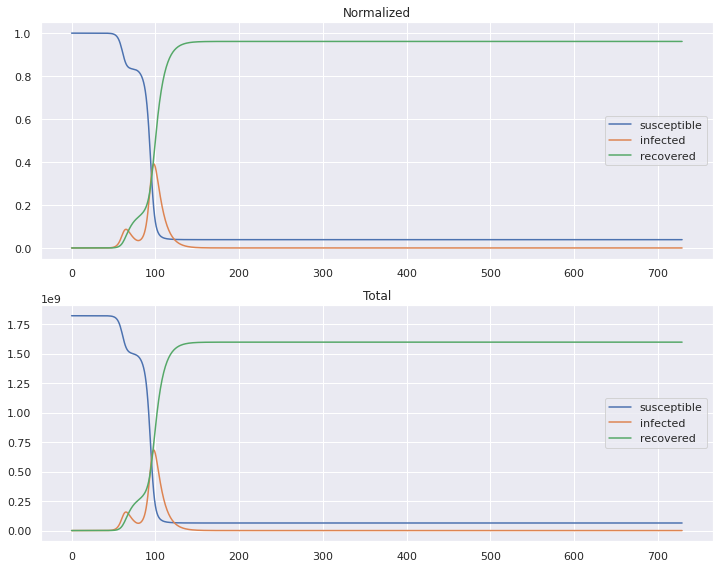

In [14]:
fig, ax = plt.subplots(2, 1, figsize = (10,8))
ax[0].plot(SIR_global_p_t[0,:], label = 'susceptible')
ax[0].plot(SIR_global_p_t[1,:], label = 'infected')
ax[0].plot(SIR_global_p_t[2,:], label = 'recovered')
ax[0].set_title('Normalized')
ax[0].legend()
ax[1].plot(SIR_global_t[0,:], label = 'susceptible')
ax[1].plot(SIR_global_t[1,:], label = 'infected')
ax[1].plot(SIR_global_t[2,:], label = 'recovered')
ax[1].set_title('Total')
ax[1].legend()
plt.tight_layout()

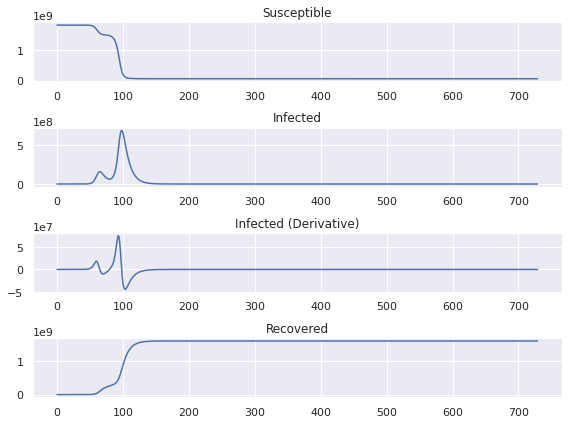

In [15]:
# los tres grupos en detalle en el instante t
fig, ax = plt.subplots(4, 1, figsize = (8,6))
ax[0].plot(SIR_global_t[0,:])
ax[0].set_title('Susceptible')
ax[1].plot(SIR_global_t[1,:])
ax[1].set_title('Infected')
ax[2].plot(np.gradient(SIR_global_t[1,:]))
ax[2].set_title('Infected (Derivative)')
ax[3].plot(SIR_global_t[2,:])
ax[3].set_title('Recovered')
plt.tight_layout()

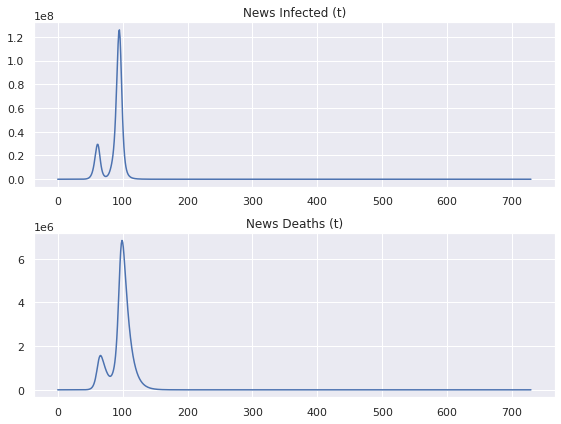

In [16]:
# nuevos infectados y muertos en el instante t
fig, ax = plt.subplots(2, 1, figsize = (8,6))
ax[0].plot(new_infected_global_t)
ax[0].set_title('News Infected (t)')
ax[1].plot(deaths_global_t)
ax[1].set_title('News Deaths (t)')
plt.tight_layout()

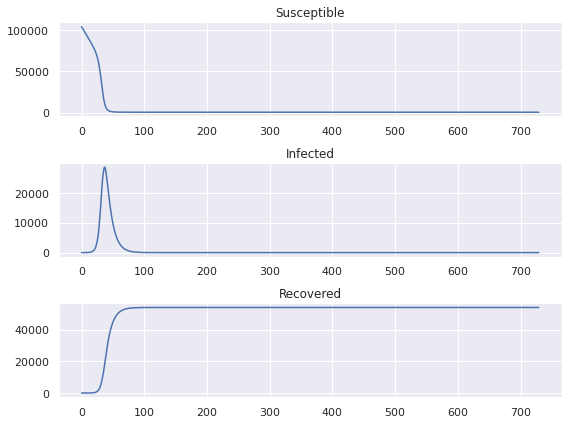

In [17]:
# los tres grupos en detalle en el instante t para el pais de inicio
fig, ax = plt.subplots(3, 1, figsize = (8,6))
ax[0].plot(SIR_t[idx_country,0,:])
ax[0].set_title('Susceptible')
ax[1].plot(SIR_t[idx_country,1,:])
ax[1].set_title('Infected')
ax[2].plot(SIR_t[idx_country,2,:])
ax[2].set_title('Recovered')
plt.tight_layout()

In [18]:
countries

['Spain', 'United States', 'China', 'Myanmar', 'Aruba', 'Vanuatu']

In [19]:
idx = []

for country in countries:
    index = df_mini.loc[df_mini["country_name"] == country].index.item()
    idx.append(index)

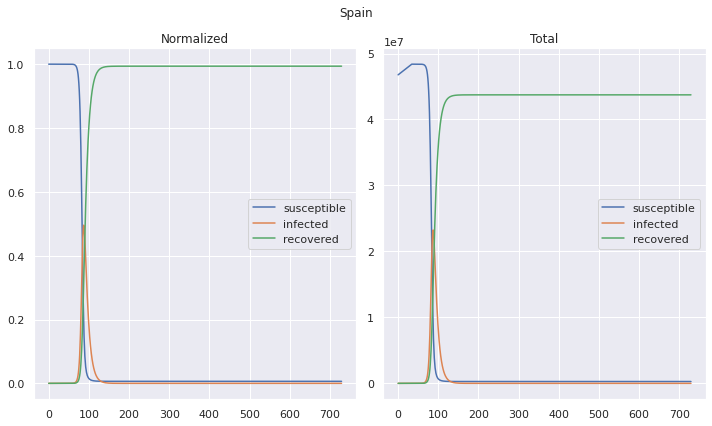

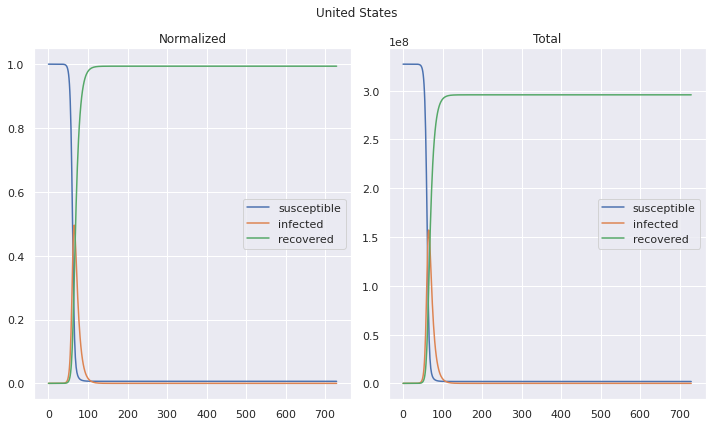

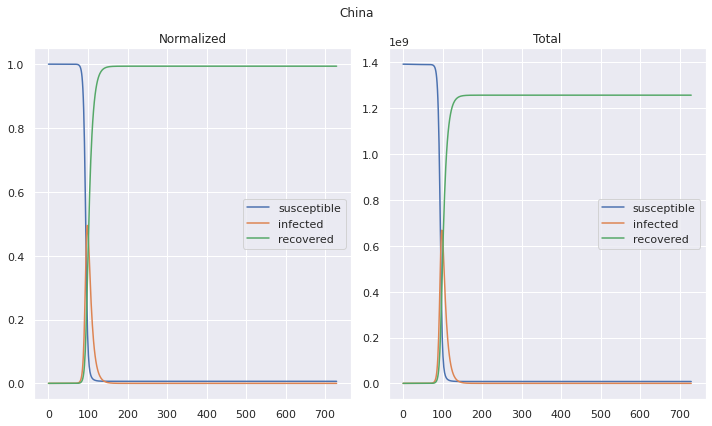

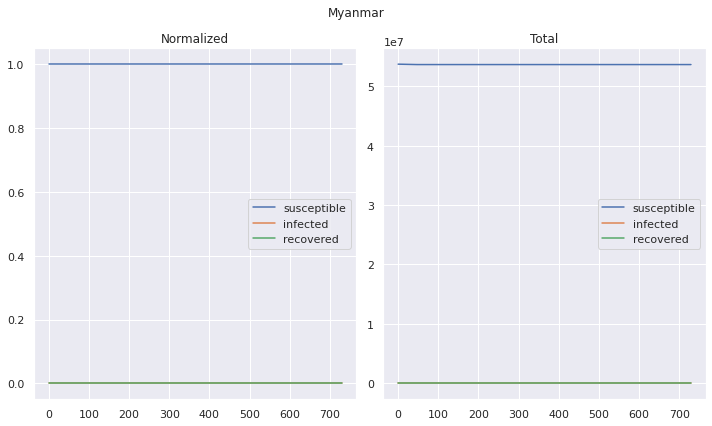

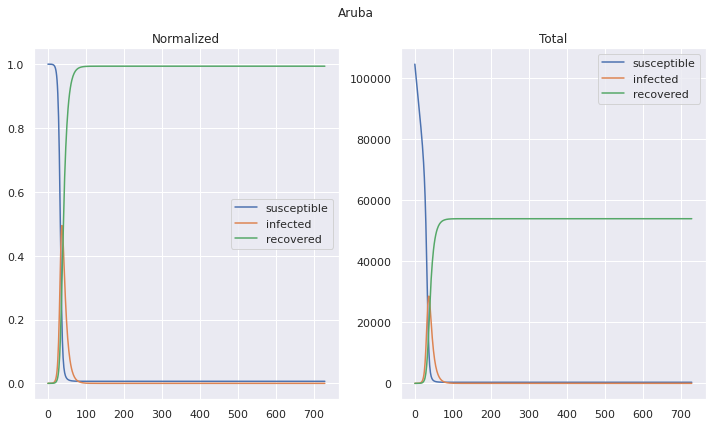

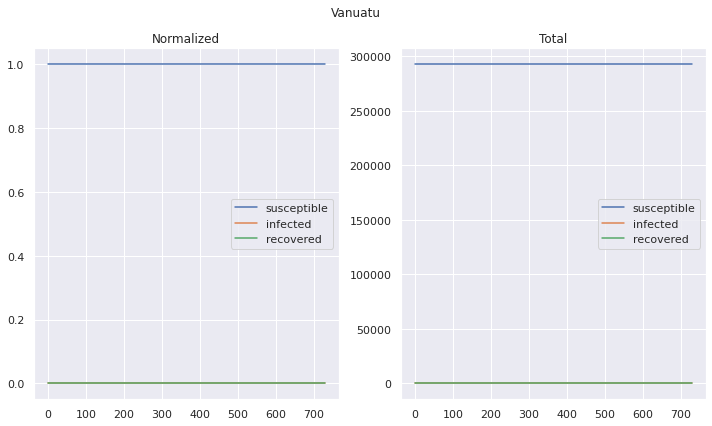

In [20]:
#idx = [168, 39]  # introduce los indices de los paises a consultar

for i, country in zip(idx, countries):
    fig, ax = plt.subplots(1, 2, figsize = (10,6))
    ax[0].plot(SIR_p_t[i, 0, :], label='susceptible')
    ax[0].plot(SIR_p_t[i, 1, :], label='infected')
    ax[0].plot(SIR_p_t[i, 2, :], label='recovered')
    ax[0].set_title('Normalized')
    ax[0].legend()
    ax[1].plot(SIR_t[i, 0, :], label='susceptible')
    ax[1].plot(SIR_t[i, 1, :], label='infected')
    ax[1].plot(SIR_t[i, 2, :], label='recovered')
    ax[1].set_title('Total')
    ax[1].legend()
    fig.suptitle(country)
    plt.tight_layout()

In [21]:
idx

[3, 4, 1, 2, 0, 5]

In [22]:
SIR_t[0, 2, :]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 6.0000e+00,
       9.0000e+00, 1.3000e+01, 1.8000e+01, 2.5000e+01, 3.5000e+01,
       4.8000e+01, 6.6000e+01, 9.1000e+01, 1.2400e+02, 1.6800e+02,
       2.2900e+02, 3.1000e+02, 4.2100e+02, 5.7100e+02, 7.7200e+02,
       1.0420e+03, 1.4020e+03, 1.8780e+03, 2.5020e+03, 3.3080e+03,
       4.3350e+03, 5.6130e+03, 7.1600e+03, 8.9740e+03, 1.1019e+04,
       1.3230e+04, 1.5941e+04, 1.8772e+04, 2.1629e+04, 2.4430e+04,
       2.7114e+04, 2.9643e+04, 3.1995e+04, 3.4162e+04, 3.6144e+04,
       3.7948e+04, 3.9584e+04, 4.1063e+04, 4.2397e+04, 4.3598e+04,
       4.4678e+04, 4.5648e+04, 4.6519e+04, 4.7300e+04, 4.8000e+04,
       4.8627e+04, 4.9189e+04, 4.9691e+04, 5.0141e+04, 5.0543e+04,
       5.0903e+04, 5.1225e+04, 5.1513e+04, 5.1771e+04, 5.2001e+04,
       5.2206e+04, 5.2390e+04, 5.2555e+04, 5.2701e+04, 5.2833e+04,
       5.2950e+04, 5.3055e+04, 5.3148e+04, 5.3232e+04, 5.3307e